***AUC = Area Under the ROC Curve***<br>
*it answers one simple question:*
> *how well does my model separate positive examples from negative ones?*

| AUC           | Meaning            |
| ------------- | ------------------ |
| **1.0**       | Perfect separation |
| **0.9+**      | Excellent          |
| **0.7 – 0.8** | Good               |
| **0.5**       | Random guessing    |
| **< 0.5**     | Worse than random  |

*So:*
- ***Accuracy** asks: Did I predict the label correctly at one cutoff?*
- ***AUC** asks: Across ALL cutoffs, how well can I rank positives above negatives?*

***That’s why AUC is very popular for:***
- *imbalanced datasets*
- *medical tests*
- *fraud detection*

***Why ROC curve?***
*The **ROC curve** plots:*
- ***TPR (Recall / Sensitivity)** on Y-axis*
- ***FPR (False Positive Rate)** on X-axis*<br>
*for **all possible thresholds.***

*AUC is just the **area under this curve.***

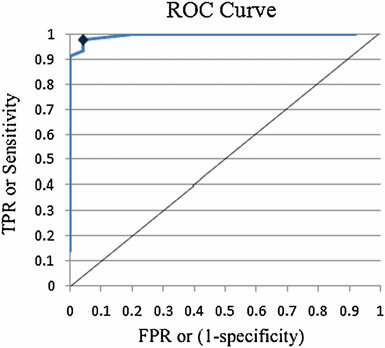

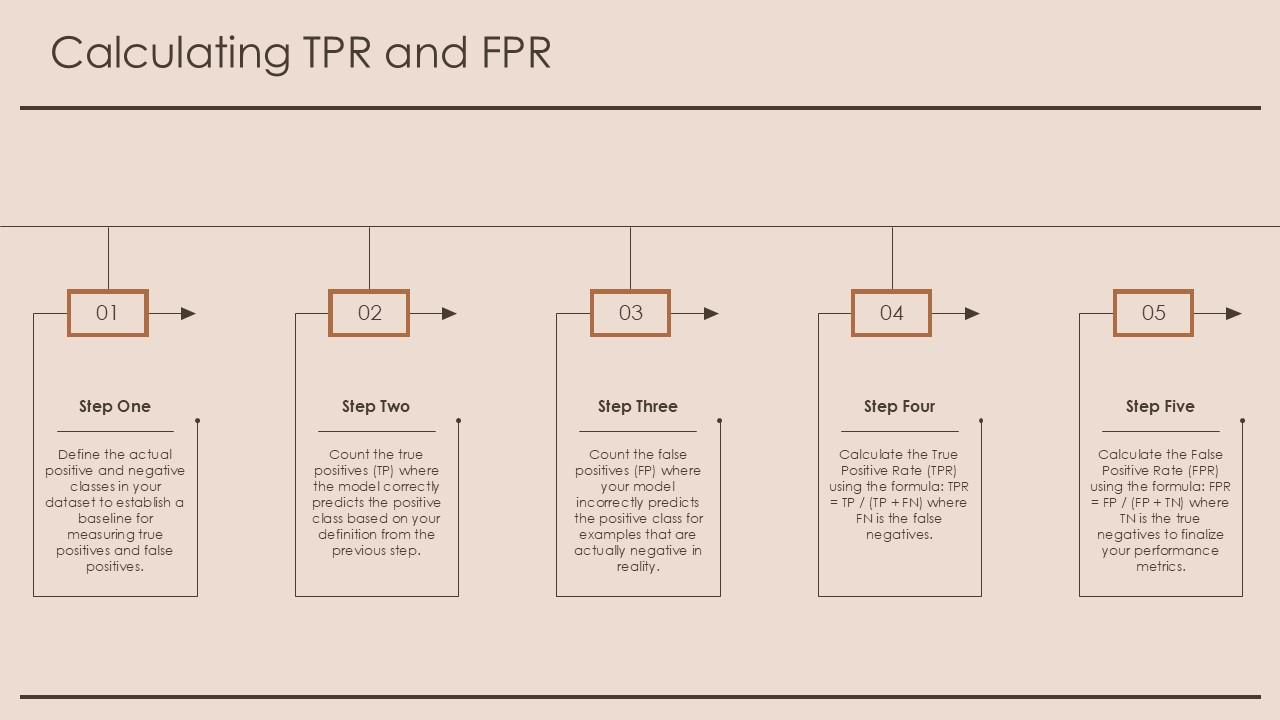

>***AUC is an excellent evaluation metric for binary classification, especially if you have class imbalance.***
>- *AUC can be used with multiclass problems! supports **one-vs-one** and **one-vs-rest** strategies.*

In [94]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('titanic')

sdf = df[['age', 'pclass', 'fare', 'survived']]
sdf = sdf.dropna()

X = sdf.drop('survived', axis=1)
y = sdf['survived']

In [95]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

***Multiclass AUC with train/test split***

In [96]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1, random_state=42)

In [97]:
from sklearn.metrics import roc_auc_score

In [98]:
y_test.shape

(72,)

In [99]:
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)
y_score.shape

(72, 2)

In [100]:
y_score

array([[0.68440836, 0.31559164],
       [0.28482057, 0.71517943],
       [0.54485794, 0.45514206],
       [0.2188599 , 0.7811401 ],
       [0.87621286, 0.12378714],
       [0.32019696, 0.67980304],
       [0.81780709, 0.18219291],
       [0.77980009, 0.22019991],
       [0.7870491 , 0.2129509 ],
       [0.74872407, 0.25127593],
       [0.17634448, 0.82365552],
       [0.59024368, 0.40975632],
       [0.2812276 , 0.7187724 ],
       [0.85041951, 0.14958049],
       [0.12256835, 0.87743165],
       [0.48995148, 0.51004852],
       [0.75309529, 0.24690471],
       [0.16981132, 0.83018868],
       [0.53198289, 0.46801711],
       [0.5114517 , 0.4885483 ],
       [0.66539853, 0.33460147],
       [0.74730956, 0.25269044],
       [0.6152789 , 0.3847211 ],
       [0.12256835, 0.87743165],
       [0.73981164, 0.26018836],
       [0.69666607, 0.30333393],
       [0.68701354, 0.31298646],
       [0.76631488, 0.23368512],
       [0.67007261, 0.32992739],
       [0.85016182, 0.14983818],
       [0.

In [101]:
#Select probability of the positive class:
y_score_pos = y_score[:, 1]
y_score_pos

array([0.31559164, 0.71517943, 0.45514206, 0.7811401 , 0.12378714,
       0.67980304, 0.18219291, 0.22019991, 0.2129509 , 0.25127593,
       0.82365552, 0.40975632, 0.7187724 , 0.14958049, 0.87743165,
       0.51004852, 0.24690471, 0.83018868, 0.46801711, 0.4885483 ,
       0.33460147, 0.25269044, 0.3847211 , 0.87743165, 0.26018836,
       0.30333393, 0.31298646, 0.23368512, 0.32992739, 0.14983818,
       0.26880991, 0.39674416, 0.65525524, 0.16648723, 0.15515201,
       0.16428736, 0.40245446, 0.45139107, 0.39755443, 0.09127662,
       0.38802582, 0.27635413, 0.70876381, 0.21614668, 0.52342907,
       0.44501317, 0.4065885 , 0.28173957, 0.59875554, 0.53999101,
       0.66143229, 0.50027334, 0.75032561, 0.21949646, 0.23500503,
       0.19361251, 0.73912797, 0.45796494, 0.22772435, 0.16218785,
       0.42438063, 0.23533352, 0.29560375, 0.30333393, 0.55226479,
       0.5414982 , 0.41394683, 0.78929803, 0.19211094, 0.6714941 ,
       0.30333393, 0.41679189])

In [102]:
#use `ovo` (One-vs-One) / 'ovr' (One-vs-Rest)
roc_auc_score(y_test, y_score_pos, multi_class='ovo')

0.74296875

In [103]:
#Select probability of the negative class:
y_score_neg = y_score[:, 0]
y_score_neg

array([0.68440836, 0.28482057, 0.54485794, 0.2188599 , 0.87621286,
       0.32019696, 0.81780709, 0.77980009, 0.7870491 , 0.74872407,
       0.17634448, 0.59024368, 0.2812276 , 0.85041951, 0.12256835,
       0.48995148, 0.75309529, 0.16981132, 0.53198289, 0.5114517 ,
       0.66539853, 0.74730956, 0.6152789 , 0.12256835, 0.73981164,
       0.69666607, 0.68701354, 0.76631488, 0.67007261, 0.85016182,
       0.73119009, 0.60325584, 0.34474476, 0.83351277, 0.84484799,
       0.83571264, 0.59754554, 0.54860893, 0.60244557, 0.90872338,
       0.61197418, 0.72364587, 0.29123619, 0.78385332, 0.47657093,
       0.55498683, 0.5934115 , 0.71826043, 0.40124446, 0.46000899,
       0.33856771, 0.49972666, 0.24967439, 0.78050354, 0.76499497,
       0.80638749, 0.26087203, 0.54203506, 0.77227565, 0.83781215,
       0.57561937, 0.76466648, 0.70439625, 0.69666607, 0.44773521,
       0.4585018 , 0.58605317, 0.21070197, 0.80788906, 0.3285059 ,
       0.69666607, 0.58320811])

In [104]:
#use `ovo` (One-vs-One) / 'ovr' (One-vs-Rest)
roc_auc_score(y_test, y_score_neg, multi_class='ovo')

0.25703125

***Multiclass AUC with cross-validation***

In [105]:
from sklearn.model_selection import cross_val_score

In [106]:
#use `roc_auc_ovo` (One-vs-One) / `roc_auc_ovr` (One-vs-Rest)
cross_val_score(clf, X,y, cv=5, scoring='roc_auc_ovo').mean()

np.float64(0.7398519752728678)

---

***What is OvO (One-vs-One)?***<br>
*Instead of fighting against all others, classes fight **pairwise.***

***Idea***<br>
*For **K classes**, train:*

>***K(K−1)/2***
​

classifiers.

***Example (A, B, C)***
- *A vs B*
- *A vs C*
- *B vs C*

*Each classifier votes for a class.*<br>
*Final prediction = **majority vote.***

***OvO pros & cons:***<br>
*✅ More precise*<br>
*✅ Better when classes overlap*<br>
*❌ Many classifiers*<br>
*❌ Slower for large K*

---

***What is OvR (One-vs-Rest)?***<br>
*Used when you have **more than 2 classes.***

***Idea***<br>
*For **K classes**, train **K binary problems:***
> *“Is this class X or NOT X?”*

***Example (3 classes: A, B, C)***<br>
- *A vs (B + C)*
- *B vs (A + C)*
- *C vs (A + B)*

*Each classifier gives a probability.*<br>
*Final prediction = class with **highest probability.***

***OvR pros & cons:***<br>
*✅ Simple*<br>
*✅ Fast*<br>
*❌ Classes may overlap heavily*<br>
*❌ Less precise when classes are similar*

---

### ***AUC with OvR vs OvO***
##### *For **multiclass AUC**, sklearn does:*

- **OvR AUC**
- *Compute ROC AUC for each class vs rest*
- *Average them*

> ***roc_auc_score(y_test, y_score, multi_class="ovr")***

- **OvO AUC**
- *Compute ROC AUC for every class pair*
- *Average all pairwise AUCs*

>***roc_auc_score(y_test, y_score, multi_class="ovo")***

| Situation                           | Use              |
| ----------------------------------- | ---------------- |
| **Binary classification**           | AUC (no ovo/ovr) |
| **Multiclass, many samples**        | OvR              |
| **Multiclass, overlapping classes** | OvO              |
| **Imbalanced data**                 | AUC > Accuracy   |

---

### ***One-line memory trick!!***
> ***AUC = ranking quality***<br>
***OvR = one class vs everyone***<br>
***OvO = class vs class***